In [1]:
!python --version
%pip install numpy -q
import numpy as np

Python 3.11.7
Note: you may need to restart the kernel to use updated packages.


# Implementação do algoritmo

In [2]:


class PCG:
    """
    
    ## Preconditioned Conjugate Gradient method to solve Ax = b.

    ### Parameters:
    tol (float): Tolerance for convergence (optional).
    max_iter (int): Maximum number of iterations (optional).

    """

    tol: float
    max_iter: int

    def __init__(self, tol=1e-10, max_iter=None) -> None:
        self.tol = tol
        self.max_iter = max_iter
        return None

    def solve(self, A, b, M_inv=None, x0=None) -> np.array:
        """
        
        ### Parameters:
        A (ndarray): The matrix A of the system Ax = b (must be symmetric and positive-definite).
        b (ndarray): The right-hand side vector.
        M_inv (ndarray): Preconditioner matrix M^-1.
        x0 (ndarray): Initial guess for the solution (optional).

        ### Returns:
        x (ndarray): The solution vector.

        """
        n = len(b)

        # Indicator
        if M_inv is None:
            M_inv = np.eye(n)
        
        # Set initial step as 0
        if x0 is None:
            x0 = np.zeros(n)

        # Initial residual
        r = b - A.dot(x0)
        
        # Apply preconditioner M^-1
        z = M_inv.dot(r)
        
        # Initial direction
        p = z.copy()
        
        # Initial solution
        x = x0.copy()
        
        # Compute initial residual norm
        res_norm = np.dot(r, z)
        
        for k in range(self.max_iter):
            Ap = A.dot(p)
            alpha = res_norm / np.dot(p, Ap)
            
            # Update solution
            x = x + alpha * p
            
            # Update residual
            r_new = r - alpha * Ap
            
            # Check for convergence
            if np.linalg.norm(r_new) < self.tol:
                print(f"Converged in {k+1} iterations")
                return x
                break
            
            # Apply preconditioner to the new residual
            z_new = M_inv.dot(r_new)
            
            res_norm_new = np.dot(r_new, z_new)
            beta = res_norm_new / res_norm
            
            # Update search direction
            p = z_new + beta * p
            
            # Update residual norm and residual for next iteration
            r = r_new
            res_norm = res_norm_new

        print(f'Did not converge in {k+1} iterations')
        return x




# Teste do algoritmo

### Resolução do problema do Exemplo 2 (Cap. 7)

Segundo o livro, deve retornar [3, 4, -5] em 3 iterações.

In [3]:

A = np.array([[4, 3, 0],
              [3, 4, -1], 
              [0, -1, 4]], dtype=float)

b = np.array([24, 30, -24], dtype=float)

M_inv = np.identity(b.shape[0])

linalg = PCG(tol = 10e-5, max_iter=100)
linalg.solve(A, b, M_inv)


Converged in 3 iterations


array([ 3.,  4., -5.])

### Resolução do problema do Exemplo 3 (Cap. 7)

Segundo o livro, deve retornar:

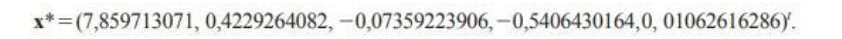

In [4]:

A = np.array([[0.2  , 0.1   , 1     , 1     , 0     ],
              [0.1  , 4     , -1    , 1     , -1    ], 
              [1    , -1    , 60    , 0     , -2    ],
              [1    , 1     , 0     , 8     , 4     ],
              [0    , -1    , -2    , 4     , 700   ]], dtype=float)

# (5, )
b = np.array([1, 2, 3, 4, 5], dtype=float).T

# (5,5)
M_inv = np.diag(1 / np.sqrt(np.abs(np.diag(A)))) 

print(f'{A=}\n')
print(f'{b=}\n')
print(f'{M_inv=}\n')


A=array([[ 2.e-01,  1.e-01,  1.e+00,  1.e+00,  0.e+00],
       [ 1.e-01,  4.e+00, -1.e+00,  1.e+00, -1.e+00],
       [ 1.e+00, -1.e+00,  6.e+01,  0.e+00, -2.e+00],
       [ 1.e+00,  1.e+00,  0.e+00,  8.e+00,  4.e+00],
       [ 0.e+00, -1.e+00, -2.e+00,  4.e+00,  7.e+02]])

b=array([1., 2., 3., 4., 5.])

M_inv=array([[2.23606798, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.5       , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.12909944, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.35355339, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.03779645]])



In [5]:

linalg = PCG(tol = 0.01, max_iter=1000)
linalg.solve(A, b, M_inv)


Converged in 5 iterations


array([ 7.85971308,  0.42292641, -0.07359224, -0.54064302,  0.01062616])

# Resolução exercício

### Exercício 01 (Capítulo 07)

O sistema linear 

$
 x_1 + \dfrac{1}{2}x_2 = \dfrac{5}{21}
$

$
 \dfrac{1}{2} x_1 + \dfrac{1}{3} x_2 = \dfrac{11}{84}
$

tem resolução $(x_1, x_2)^t = (\dfrac{1}{6}, \dfrac{1}{7})$.


In [6]:
# Para ter ideia de qual o resultado sem a fracao
print(f'1 / 6 = {1/61}')
print(f'1 / 7 = {1/7}')

1 / 6 = 0.01639344262295082
1 / 7 = 0.14285714285714285


In [7]:
A = np.array([[1    , 1/2],
              [1/2  , 1/3]], dtype=float)

b = np.array([5/21, 11/84], dtype=float).T



#### b) Resolva o sistema linear utilizando o método do gradiente conjugado $(C = C^{-1} = I)$ [...]


In [8]:

# Utilizando a identidade como precondicionamento
M_inv = np.eye(len(b))

linalg = PCG(tol = 10e-5, max_iter=1000)
linalg.solve(A, b, M_inv)


Converged in 2 iterations


array([0.16666667, 0.14285714])


#### d) Escolha $C^{-1} = D^{-\frac{1}{2}}$. Esta escolha melhora o método do gradiente conjugado?

In [9]:

# Utilizando a identidade como precondicionamento
M_inv = np.diag(1 / np.sqrt(np.diag(A)))

linalg = PCG(tol = 10e-5, max_iter=1000)
linalg.solve(A, b, M_inv)


Converged in 2 iterations


array([0.16666667, 0.14285714])

Segundo a implementação, não melhora para um $\epsilon$ (tolerância) muito pequena.

Por exemplo, tolerância $ = \epsilon = 10e^{-20}$, o algoritmo com este método converge em 3 iterações.

In [10]:

# Utilizando a identidade como precondicionamento
M_inv = np.diag(1 / np.sqrt(np.diag(A)))

linalg = PCG(tol = 10e-20, max_iter=1000)
linalg.solve(A, b, M_inv)


Converged in 3 iterations


array([0.16666667, 0.14285714])

Enquanto apenas a indicadora converge em 4 iterações

In [11]:

# Utilizando a identidade como precondicionamento
M_inv = np.eye(len(b))

linalg = PCG(tol = 10e-20, max_iter=1000)
linalg.solve(A, b, M_inv)


Converged in 4 iterations


array([0.16666667, 0.14285714])

Indicando, portanto, que o método tem uma sutil melhora na capacidade de convergência, devendo ser avaliado em outros problemas. 

Especialmente problemas mais complexos, com matrizes maiores.